In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,InputLayer,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import cv2 as cv
import random

In [2]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder,dir1)):
            img=cv.imread(os.path.join(img_folder,dir1,file),cv.COLOR_BGR2RGB)
            img=cv.resize(img,(224,224),interpolation=cv.INTER_AREA)
            img=img.astype('float32')
            img/=255
            img_data_array.append(img)
            class_name.append("COVID")
        break    
    return img_data_array,class_name
img_datac,class_namec=create_dataset(r"D:\Srikanth\CXR\Dataset1\COVID-19_Radiography_Dataset\COVID")
            

In [3]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder,dir1)):
            img=cv.imread(os.path.join(img_folder,dir1,file),cv.COLOR_BGR2RGB)
            img=cv.resize(img,(224,224),interpolation=cv.INTER_AREA)
            img=img.astype('float32')
            img/=255
            img_data_array.append(img)
            class_name.append("Normal")
        break    
    return img_data_array,class_name
img_datan,class_namen=create_dataset(r"D:\Srikanth\CXR\Dataset1\COVID-19_Radiography_Dataset\Normal")
            

In [4]:
img_datac.extend(img_datan)
img_datac[0].shape
class_namec.extend(class_namen)

In [5]:
import numpy as np
target_dict={k:v for v,k in enumerate(np.unique(class_namec))}
target_dict

{'COVID': 0, 'Normal': 1}

In [6]:
target_val=[target_dict[class_namec[i]] for i in range(len(class_namec))]

In [7]:
num_classes=2
img_rows=224
img_cols=224

In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import decode_predictions
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Input,ZeroPadding2D,Activation,Add
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
# from keras.utils import load_img, img_to_array 
import tensorflow as tf

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import AveragePooling1D 
from tensorflow.keras.layers import MaxPooling2D

from PIL import Image 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 
from tensorflow.keras.initializers import glorot_uniform

In [9]:
# x is input, y=F(x)
# identity block simply means input should be equal to output. 
#  y = x + F(x)   the layers in a traditional network are learning the true output H(x)
# F(x) = y - x   the layers in a residual network are learning the residual F(x)
# Hence, the name: Residual Block.



def identity_block(X, f, filters, stage, block):
    """
   
    Arguments:
    X -- input of shape (m, height, width, channel)
    f -- shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Saving the input value.we need this later to add to the output. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [10]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    # First layer 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X) # 1,1 is filter size
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)  # normalization on channels
    X = Activation('relu')(X)

      
    # Second layer  (f,f)=3*3 filter by default
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [17]:
#Each ResNet block is either 2 layer deep
def ResNet50(input_shape, classes):
    """
    Implementation of the ResNet50 architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input) #3,3 padding

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X) #64 filters of 7*7 
    X = BatchNormalization(axis=3, name='bn_conv1')(X) #batchnorm applied on channels
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X) #window size is 3*3

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    # convolutional_block is a function defined above. Convolutional_block have 3 layers.
    #filters=[64, 64, 256] first 64 is for 1st layer and 2nd 64 is for 2nd layer and 256 is for 3rd layer of convultional block   
    # below are the conv layers from convolutional_block function
    #X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
    #X = Conv2D(F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
   
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b') 
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)


    ### START CODE HERE ###

    # Stage 3 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL 
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(512, activation='relu',name ='Resnet50_last_layer')(X)
    X = Dense(1, activation='sigmoid', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [18]:
from utils import my_precision,my_recall,my_f1,my_roc_auc,get_specificity,get_balanced_acc,plotConfusionMatrix,plotCurves,progressBar,plotROCCurve

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gc
import shutil
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LSTM
import tensorflow.keras
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import KFold
import tensorflow.keras.metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
import warnings
import time

In [20]:
x=np.array(tf.expand_dims(img_datac,axis=-1), np.float32)
y=np.array(list(map(int,target_val)), np.float32)
(trainX,testX,trainY,testY) = train_test_split(x,y,test_size=0.2,shuffle=True)

In [21]:
METRICS = [
    tensorflow.keras.metrics.BinaryAccuracy(name='accuracy'),
    tensorflow.keras.metrics.Precision(name='precision'),
    tensorflow.keras.metrics.Recall(name='recall'),
    tensorflow.keras.metrics.AUC(name='AUC')
]

In [22]:

num_folds = 5
fold_no = 1
scoring = {'accuracy': 'accuracy',
           'precision': make_scorer(my_precision),
           'recall':make_scorer(my_recall),
           'roc_auc':make_scorer(my_roc_auc),
           'f1':make_scorer(my_f1),
           'balanced_accuracy': 'balanced_accuracy'}
acc_per_fold = []
recall_per_fold = []
precision_per_fold = []
roc_auc_per_fold = []
f1_per_fold = []
balanced_acc = []
specificity_per_fold = []
loss_per_fold = []
histories = []



kfold = KFold(n_splits=num_folds, shuffle=True,random_state=75)


for train,test in kfold.split(trainX,trainY):
    epochs = 30
    batch_size = 128
    learning_rate = 0.001
#     print(train,test)
    
    optimizer = tensorflow.keras.optimizers.Adamax(learning_rate = learning_rate)
    opt=tf.keras.optimizers.Adam(learning_rate=0.001)
    filepath="Resnet50_best_weights_"+str(fold_no)+".hdf5"    
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    ###### Model architecture
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    model=ResNet50((224,224,1),2)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=METRICS)
#     model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=METRICS)
    start = time.time()
#     history = model.fit(trainX[train], trainY[train], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(trainX[test],trainY[test]),callbacks=[checkpoint])
    history=model.fit(trainX[train],trainY[train], batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(trainX[test],trainY[test]),callbacks=[checkpoint])
    end = time.time()
    print("Training time : ",(end-start))
    histories.append(history)
    scores = model.evaluate(trainX[test], trainY[test], verbose=0)
    covPredict = model.predict(trainX[test])
    covPredict = np.where(covPredict >= 0.5, 1,0)
    real_stat = trainY[test]
    acc_per_fold.append(scores[1])
    recall_per_fold.append(my_recall(real_stat, covPredict))
    precision_per_fold.append(my_precision(real_stat, covPredict))
    roc_auc_per_fold.append(my_roc_auc(real_stat, covPredict))
    f1_per_fold.append(my_f1(real_stat, covPredict))
    balanced_acc.append(get_balanced_acc(real_stat, covPredict))
    specificity_per_fold.append((2*get_balanced_acc(trainY[test],covPredict))-my_recall(trainY[test],covPredict))
    loss_per_fold.append(scores[0])
    model = load_model('Resnet50_best_weights_'+str(fold_no)+'.hdf5')
    score = model.evaluate(trainX[test],trainY[test], verbose=0)
    covPredict = model.predict(trainX[test])
    covPredict = np.where(covPredict > 0.5, 1,0)
    print("Validation results for the fold "+str(fold_no)+":")
    print("Accuracy : ",score[1])
    print("Precision : ",my_precision(trainY[test],covPredict))
    print("Recall : ",my_recall(trainY[test],covPredict))
    print("F1 : ",my_f1(trainY[test],covPredict))
    print("ROC AUC : ",my_roc_auc(trainY[test],covPredict))
    print("Specificity : ",(2*get_balanced_acc(trainY[test],covPredict))-my_recall(trainY[test],covPredict))
    score = model.evaluate(testX,testY,verbose=0)
    covPredict = model.predict(testX)
    covPredict = np.where(covPredict >= 0.5, 1,0)
    print("Test results for the fold "+str(fold_no)+":")
    print("Accuracy : ",score[1])
    print("Precision : ",my_precision(testY,covPredict))
    print("Recall : ",my_recall(testY,covPredict))
    print("F1 : ",my_f1(testY,covPredict))
    print("ROC AUC : ",my_roc_auc(testY,covPredict))
    print("Specificity : ",(2*get_balanced_acc(testY,covPredict))-my_recall(testY,covPredict))
    fold_no = fold_no + 1

print("Accuracy per fold : ",acc_per_fold)
print("Precision per fold : ",precision_per_fold)
print("Recall per fold : ",recall_per_fold)
print("ROC AUC per fold : ",roc_auc_per_fold)
print("F1 per fold : ",f1_per_fold)
print("Specificity per fold : ",specificity_per_fold)

print("Mean Accuracy : ",np.mean(acc_per_fold))
print("std Accuracy : ",np.std(acc_per_fold))
print("Mean Precision : ",np.mean(precision_per_fold))
print("std Precision : ",np.std(precision_per_fold))
print("Mean Recall : ",np.mean(recall_per_fold))
print("std Recall : ",np.std(recall_per_fold))
print("Mean ROC AUC : ",np.mean(roc_auc_per_fold))
print("std ROC AUC : ",np.std(roc_auc_per_fold))
print("Mean F1 : ",np.mean(f1_per_fold))
print("std F1 : ",np.std(f1_per_fold))
print("Mean Specificity : ",np.mean(get_specificity(balanced_acc,recall_per_fold)))
print("std Specificity : ",np.std(get_specificity(balanced_acc,recall_per_fold)))


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/30
70/70 [==============================] - ETA: 0s - loss: 1.8680 - accuracy: 0.7167 - precision: 0.7356 - recall: 0.9600 - AUC: 0.5684 
Epoch 00001: val_accuracy improved from -inf to 0.73846, saving model to Resnet50_best_weights_1.hdf5
70/70 [==============================] - 2314s 33s/step - loss: 1.8680 - accuracy: 0.7167 - precision: 0.7356 - recall: 0.9600 - AUC: 0.5684 - val_loss: 0.6208 - val_accuracy: 0.7385 - val_precision: 0.7385 - val_recall: 1.0000 - val_AUC: 0.5000
Epoch 2/30
70/70 [==============================] - ETA: 0s - loss: 0.5861 - accuracy: 0.7354 - precision: 0.7359 - recall: 0.9988 - AUC: 0.7056 
Epoch 00002: val_accuracy did not improve from 0.73846
70/70 [==============================] - 2273s 32s/step - loss: 0.5861 - accuracy: 0.7354 - precision: 0.7359 - recall: 0.9988 - AUC: 0.7056 - val_loss: 0.6143 - val_accuracy: 0.7385 - val_precision: 0.7385 -

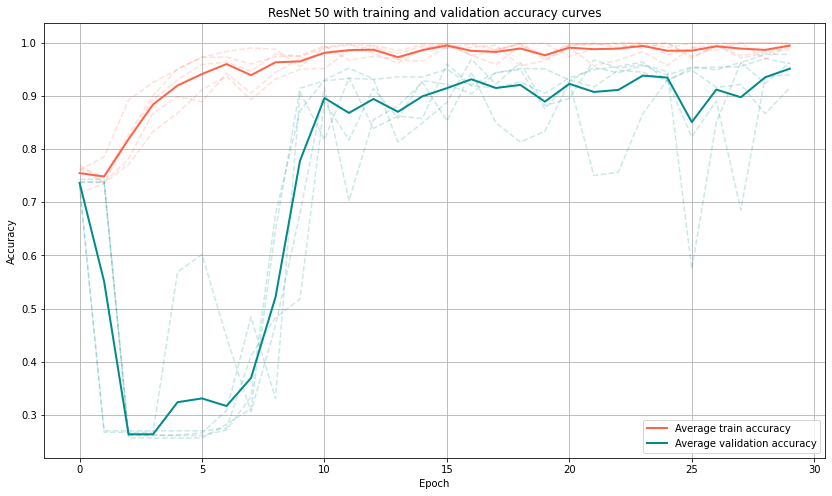

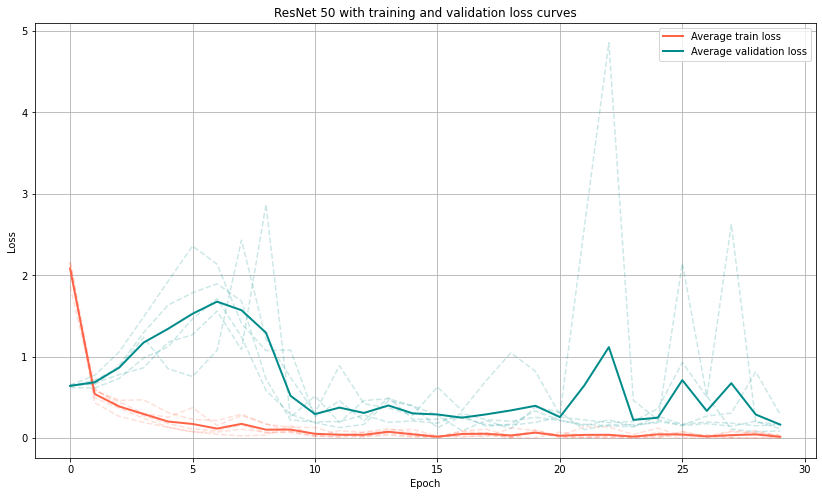

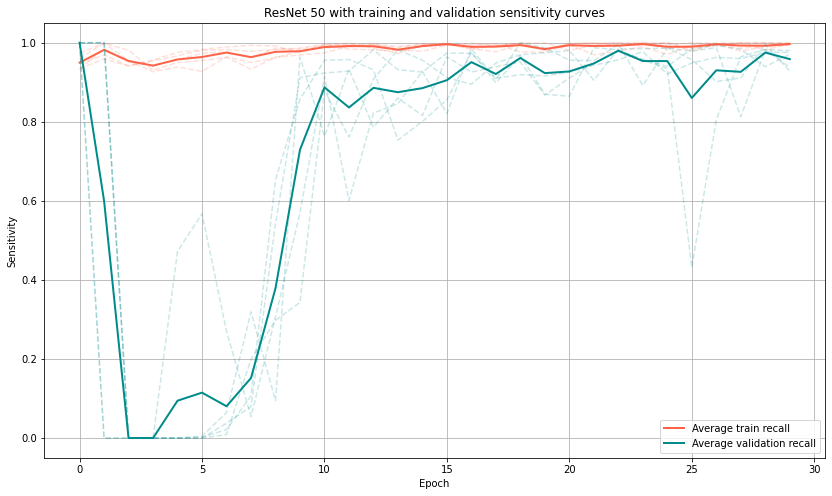

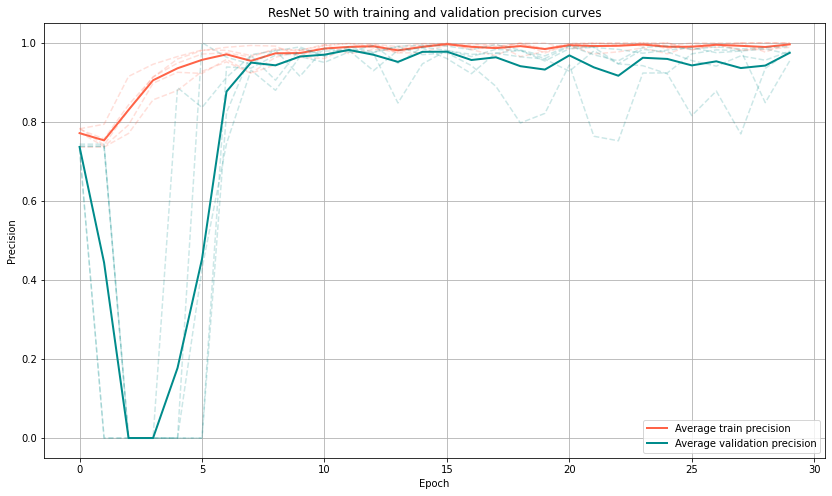

In [23]:
plotCurves('ResNet 50 with training and validation accuracy curves','Accuracy','Epoch','accuracy',histories)
## Plot loss curves
plotCurves('ResNet 50 with training and validation loss curves','Loss','Epoch','loss',histories)

## Plot Sensitivity curves
plotCurves('ResNet 50 with training and validation sensitivity curves','Sensitivity','Epoch','recall',histories)

## Plot Precision curves
plotCurves('ResNet 50 with training and validation precision curves','Precision','Epoch','precision',histories)

In [24]:
model.save("resnet50-fold_updated.h5")

In [25]:
model=load_model("resnet50-fold_updated.h5")

In [27]:
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="Resnet50_last_layer").output,)

In [29]:
f=open("Resnet50_feature.csv","w")
for i in range(len(img_datac)):
    img=img_datac[i]
    img=np.expand_dims(img,axis=0)
    
    
    features =list( feature_extractor(img))
    for j in list(features[0]):
        f.write(str(float(j))+",")
    f.write(str(target_val[i])+"\n")    
f.close()

In [30]:
import pandas as pd
df=pd.read_csv(r"Resnet50_feature.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,0.0,0.0,0.000000,0.192377,0.0,0.0,0.0,7.221508,0.387742,0.416056,...,0.0,0.649808,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,8.169828,0.000000,0.294759,...,0.0,0.620508,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,8.208215,0.032336,0.390621,...,0.0,0.581622,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
3,0.0,0.0,0.117877,0.279377,0.0,0.0,0.0,6.764134,0.407012,0.410989,...,0.0,0.662125,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
4,0.0,0.0,0.192273,0.072914,0.0,0.0,0.0,7.836219,0.725569,0.839643,...,0.0,0.779292,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13803,0.0,0.0,3.433223,3.768656,0.0,0.0,0.0,7.096492,4.450061,2.733965,...,0.0,2.907542,0.0,0.0,0.0,0.0,0.0,0.0,0.029303,1
13804,0.0,0.0,2.006680,2.029826,0.0,0.0,0.0,5.712438,2.805622,1.489385,...,0.0,1.561024,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
13805,0.0,0.0,2.542660,2.600793,0.0,0.0,0.0,5.570811,3.061878,2.126314,...,0.0,2.197996,0.0,0.0,0.0,0.0,0.0,0.0,0.083543,1
13806,0.0,0.0,2.898853,2.854096,0.0,0.0,0.0,5.699463,3.318120,2.311920,...,0.0,2.293238,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1


In [31]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [35]:
grid_search.best_score_

0.9799923143316406

In [36]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [37]:
rf_best.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [38]:
from sklearn.metrics import classification_report
y_pred=rf_best.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       735
           1       0.99      0.98      0.98      2027

    accuracy                           0.98      2762
   macro avg       0.97      0.97      0.97      2762
weighted avg       0.98      0.98      0.98      2762

